In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Loading Data...")

#Load the data
patients = pd.read_csv('../data/raw/patients_baseline.csv')
treatments = pd.read_csv('../data/raw/treatments_baseline.csv')
outcomes = pd.read_csv('../data/raw/outcomes_baseline.csv')

print(f"✓ Patients: {len(patients):,} records")
print(f"✓ Treatments: {len(treatments):,} records")
print(f"✓ Outcomes: {len(outcomes):,} records")
print(f"\nFailure rate: {outcomes['failed'].mean():.1%}")
print(f"Patients who failed: {outcomes['failed'].sum()}")

Loading Data...
✓ Patients: 1,000 records
✓ Treatments: 156,000 records
✓ Outcomes: 1,000 records

Failure rate: 42.4%
Patients who failed: 424


PATIENT BASELINE CHARCTERISTICS


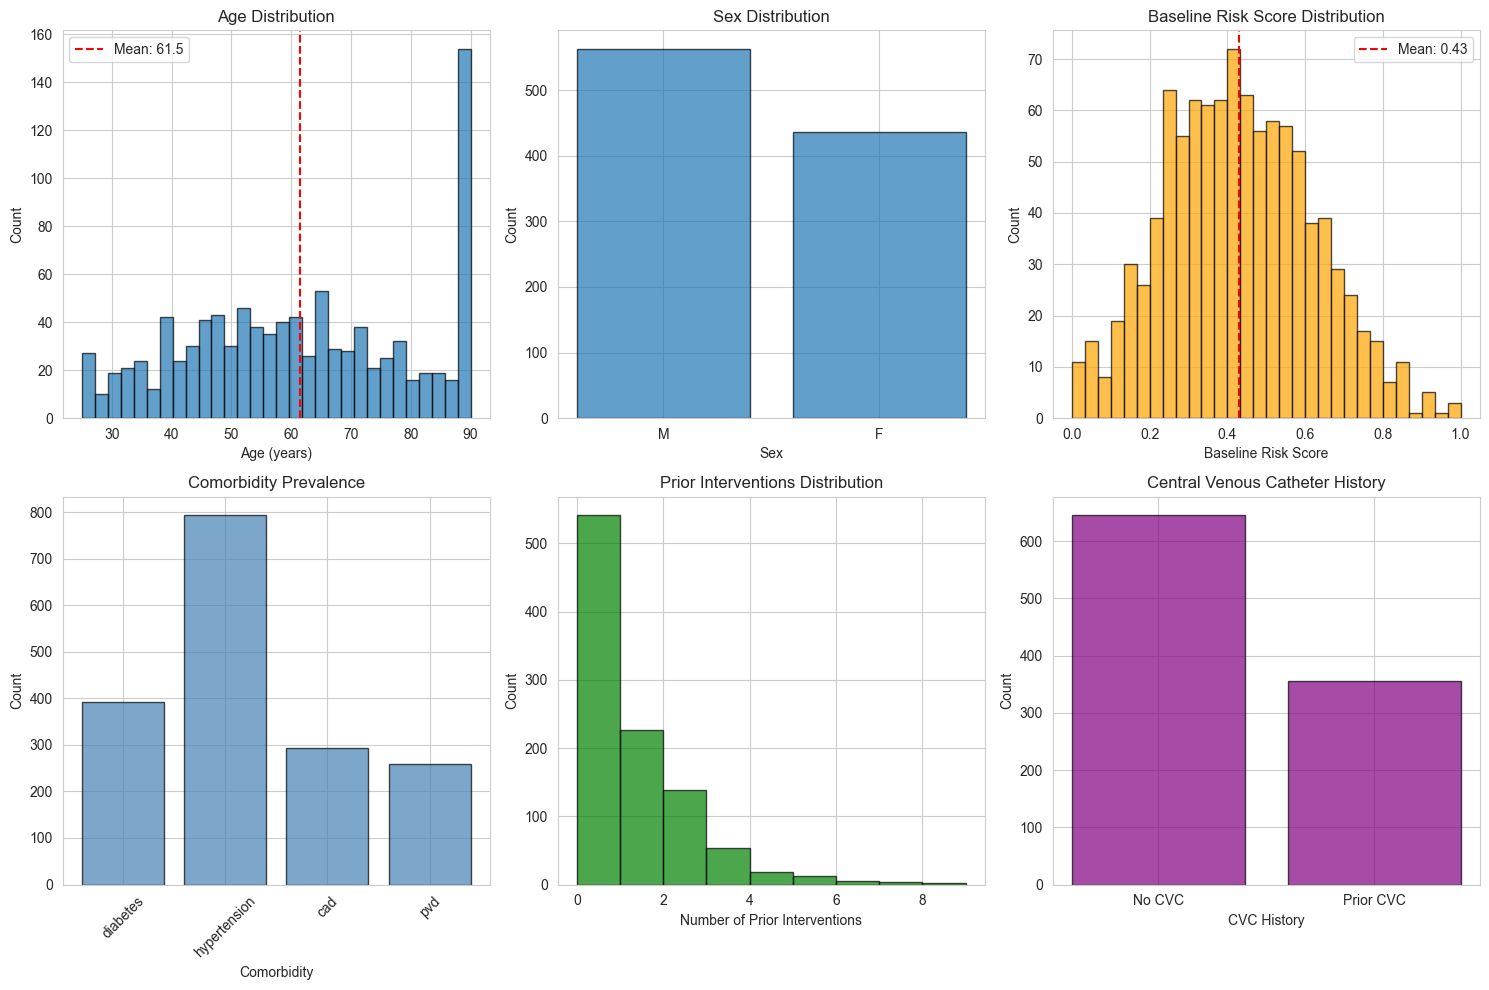


Summary Statistics:
               age  baseline_risk_score     diabetes  hypertension  \
count  1000.000000          1000.000000  1000.000000   1000.000000   
mean     61.467000             0.429512     0.393000      0.793000   
std      19.000683             0.190404     0.488661      0.405358   
min      25.000000             0.000000     0.000000      0.000000   
25%      46.750000             0.288687     0.000000      1.000000   
50%      61.000000             0.419592     0.000000      1.000000   
75%      77.000000             0.559220     1.000000      1.000000   
max      90.000000             1.000000     1.000000      1.000000   

              cad          pvd  
count  1000.00000  1000.000000  
mean      0.29400     0.259000  
std       0.45582     0.438305  
min       0.00000     0.000000  
25%       0.00000     0.000000  
50%       0.00000     0.000000  
75%       1.00000     1.000000  
max       1.00000     1.000000  


In [2]:
print("=" * 60)
print("PATIENT BASELINE CHARCTERISTICS")
print("=" * 60)

#Age distribution
fig, axes = plt.subplots(2, 3, figsize = (15,10))

#Age
axes[0, 0].hist(patients['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].axvline(patients['age'].mean(), color='red', linestyle='--', label=f'Mean: {patients["age"].mean():.1f}')
axes[0, 0].legend()

#Sex
sex_counts = patients['sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Sex Distribution')

# Baseline Risk Score
axes[0, 2].hist(patients['baseline_risk_score'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_xlabel('Baseline Risk Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Baseline Risk Score Distribution')
axes[0, 2].axvline(patients['baseline_risk_score'].mean(), color='red', linestyle='--',
                   label=f'Mean: {patients["baseline_risk_score"].mean():.2f}')
axes[0, 2].legend()

# Comorbidities
comorbidities = ['diabetes', 'hypertension', 'cad', 'pvd']
comorbidity_counts = [patients[col].sum() for col in comorbidities]
axes[1, 0].bar(comorbidities, comorbidity_counts, edgecolor='black', alpha=0.7, color='steelblue')
axes[1, 0].set_xlabel('Comorbidity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Comorbidity Prevalence')
axes[1, 0].tick_params(axis='x', rotation=45)

# Prior interventions
axes[1, 1].hist(patients['prior_interventions'], bins=range(0, 10), edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_xlabel('Number of Prior Interventions')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Prior Interventions Distribution')

# History of CVC
cvc_counts = patients['history_cvc'].value_counts()
axes[1, 2].bar(['No CVC', 'Prior CVC'], [cvc_counts[0], cvc_counts[1]], edgecolor='black', alpha=0.7, color='purple')
axes[1, 2].set_xlabel('CVC History')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Central Venous Catheter History')

plt.tight_layout()
plt.show()

#Summary statistics
print("\nSummary Statistics:")
print(patients[['age', 'baseline_risk_score', 'diabetes', 'hypertension', 'cad', 'pvd']].describe())

HEMODYNAMIC DATA ANALYSIS


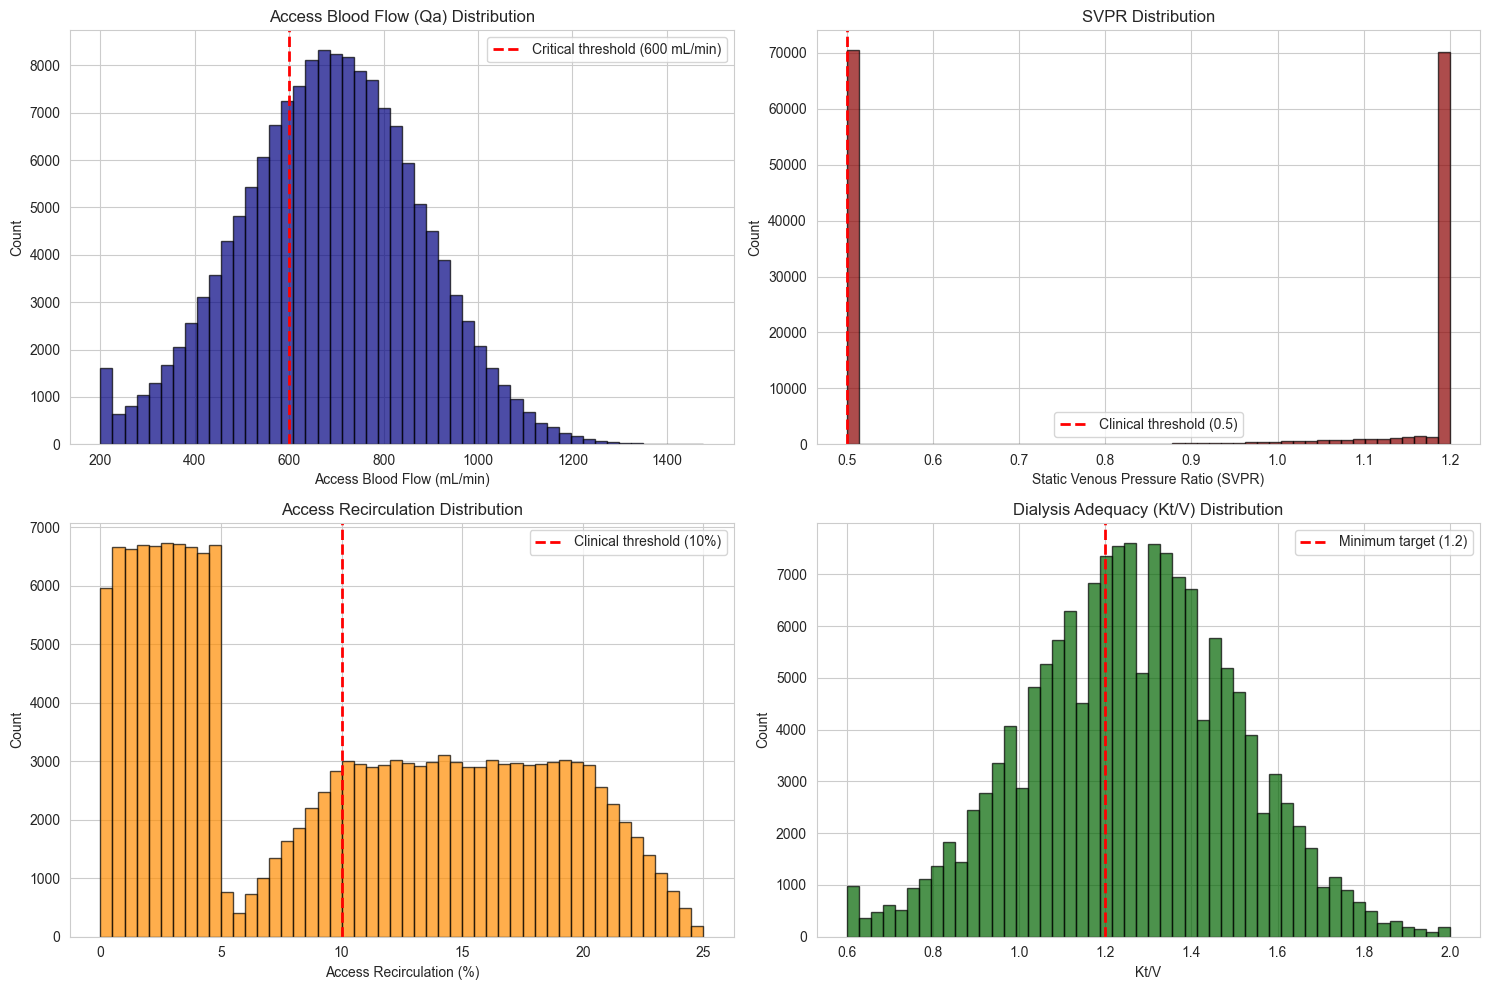


Hemodynamic Summary Statistics:
       access_blood_flow_qa  venous_pressure_mean           svpr  \
count         156000.000000         156000.000000  156000.000000   
mean             685.688374            161.298947       0.870941   
std              190.858640             25.926221       0.340085   
min              200.000000             80.000000       0.500000   
25%              557.800000            143.300000       0.500000   
50%              688.600000            160.200000       1.091000   
75%              816.600000            178.100000       1.200000   
max             1477.500000            283.700000       1.200000   

       access_recirculation_pct            ktv  
count             156000.000000  156000.000000  
mean                   9.669913       1.258373  
std                    7.155318       0.243827  
min                    0.000000       0.600000  
25%                    2.900000       1.090000  
50%                    9.400000       1.260000  
75%        

In [3]:
print("=" * 60)
print("HEMODYNAMIC DATA ANALYSIS")
print("=" * 60)

# Merge outcomes with treatments to color by failure status
treatments_with_outcome = treatments.merge(outcomes[['patient_id', 'failed']], on='patient_id')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Access Blood Flow (Qa) distribution
axes[0, 0].hist(treatments['access_blood_flow_qa'], bins=50, edgecolor='black', alpha=0.7, color='navy')
axes[0, 0].axvline(600, color='red', linestyle='--', linewidth=2, label='Critical threshold (600 mL/min)')
axes[0, 0].set_xlabel('Access Blood Flow (mL/min)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Access Blood Flow (Qa) Distribution')
axes[0, 0].legend()

# SVPR distribution
axes[0, 1].hist(treatments['svpr'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[0, 1].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Clinical threshold (0.5)')
axes[0, 1].set_xlabel('Static Venous Pressure Ratio (SVPR)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('SVPR Distribution')
axes[0, 1].legend()

# Access Recirculation
axes[1, 0].hist(treatments['access_recirculation_pct'], bins=50, edgecolor='black', alpha=0.7, color='darkorange')
axes[1, 0].axvline(10, color='red', linestyle='--', linewidth=2, label='Clinical threshold (10%)')
axes[1, 0].set_xlabel('Access Recirculation (%)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Access Recirculation Distribution')
axes[1, 0].legend()

# Kt/V
axes[1, 1].hist(treatments['ktv'], bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
axes[1, 1].axvline(1.2, color='red', linestyle='--', linewidth=2, label='Minimum target (1.2)')
axes[1, 1].set_xlabel('Kt/V')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Dialysis Adequacy (Kt/V) Distribution')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nHemodynamic Summary Statistics:")
print(treatments[['access_blood_flow_qa', 'venous_pressure_mean', 'svpr', 'access_recirculation_pct', 'ktv']].describe())

COMPARING FAILED VS NON-FAILED PATIENTS


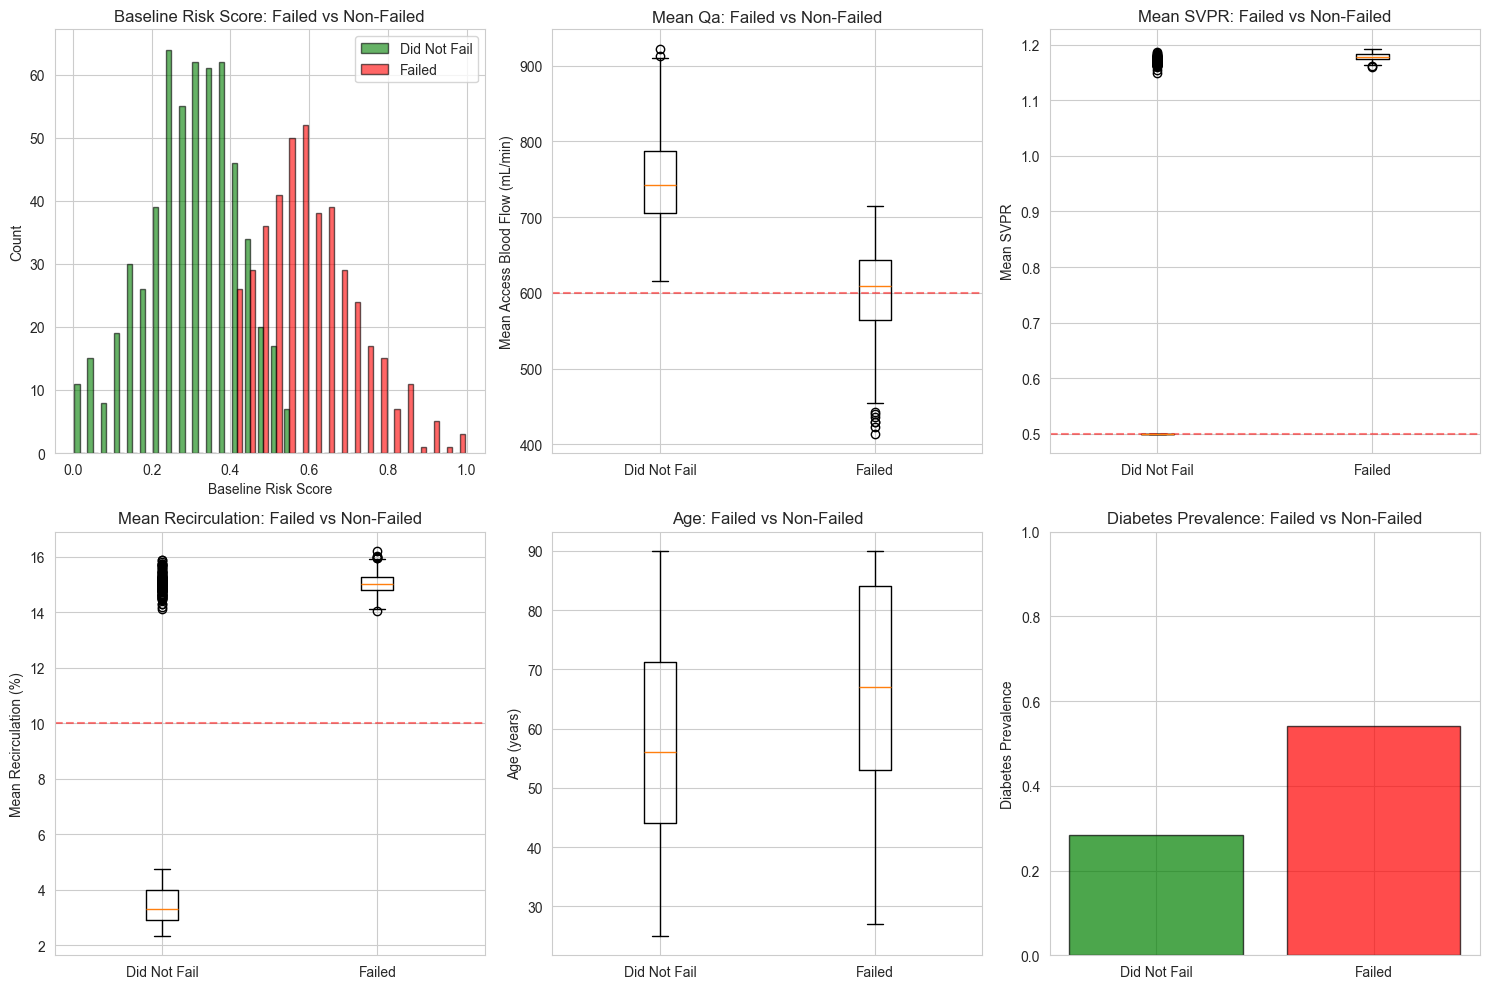


Statistical Comparison (Failed vs Non-Failed):
        baseline_risk_score     mean_qa  mean_svpr  mean_recirculation  \
failed                                                                   
0                  0.302950  748.623375   0.644605            5.736958   
1                  0.601444  600.191768   1.178416           15.012796   

        total_alarms  
failed                
0         187.347222  
1         372.643868  


In [4]:
print("=" * 60)
print("COMPARING FAILED VS NON-FAILED PATIENTS")
print("=" * 60)

# Merge outcomes with patients
patients_with_outcome = patients.merge(outcomes[['patient_id', 'failed']], on='patient_id')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Baseline Risk Score by Failure Status
failed = patients_with_outcome[patients_with_outcome['failed'] == 1]['baseline_risk_score']
not_failed = patients_with_outcome[patients_with_outcome['failed'] == 0]['baseline_risk_score']

axes[0, 0].hist([not_failed, failed], bins=30, label=['Did Not Fail', 'Failed'],
                color=['green', 'red'], alpha=0.6, edgecolor='black')
axes[0, 0].set_xlabel('Baseline Risk Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Baseline Risk Score: Failed vs Non-Failed')
axes[0, 0].legend()

# Mean Qa by Failure Status
axes[0, 1].boxplot([outcomes[outcomes['failed'] == 0]['mean_qa'],
                     outcomes[outcomes['failed'] == 1]['mean_qa']],
                    labels=['Did Not Fail', 'Failed'])
axes[0, 1].set_ylabel('Mean Access Blood Flow (mL/min)')
axes[0, 1].set_title('Mean Qa: Failed vs Non-Failed')
axes[0, 1].axhline(600, color='red', linestyle='--', alpha=0.5, label='Threshold')

# Mean SVPR by Failure Status
axes[0, 2].boxplot([outcomes[outcomes['failed'] == 0]['mean_svpr'],
                     outcomes[outcomes['failed'] == 1]['mean_svpr']],
                    labels=['Did Not Fail', 'Failed'])
axes[0, 2].set_ylabel('Mean SVPR')
axes[0, 2].set_title('Mean SVPR: Failed vs Non-Failed')
axes[0, 2].axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Threshold')

# Mean Recirculation by Failure Status
axes[1, 0].boxplot([outcomes[outcomes['failed'] == 0]['mean_recirculation'],
                     outcomes[outcomes['failed'] == 1]['mean_recirculation']],
                    labels=['Did Not Fail', 'Failed'])
axes[1, 0].set_ylabel('Mean Recirculation (%)')
axes[1, 0].set_title('Mean Recirculation: Failed vs Non-Failed')
axes[1, 0].axhline(10, color='red', linestyle='--', alpha=0.5, label='Threshold')

# Age by Failure Status
axes[1, 1].boxplot([patients_with_outcome[patients_with_outcome['failed'] == 0]['age'],
                     patients_with_outcome[patients_with_outcome['failed'] == 1]['age']],
                    labels=['Did Not Fail', 'Failed'])
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('Age: Failed vs Non-Failed')

# Diabetes prevalence by Failure Status
diabetes_by_outcome = patients_with_outcome.groupby('failed')['diabetes'].mean()
axes[1, 2].bar(['Did Not Fail', 'Failed'], diabetes_by_outcome.values,
               color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[1, 2].set_ylabel('Diabetes Prevalence')
axes[1, 2].set_title('Diabetes Prevalence: Failed vs Non-Failed')
axes[1, 2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Print statistical comparison
print("\nStatistical Comparison (Failed vs Non-Failed):")
comparison = outcomes.groupby('failed')[['baseline_risk_score', 'mean_qa', 'mean_svpr',
                                          'mean_recirculation', 'total_alarms']].mean()
print(comparison)

In [5]:
print("=" * 60)
print("FEATURE ENGINEERING: TIME-BASED FEATURES")
print("=" * 60)

# Sort treatments by patient and treatment number
treatments = treatments.sort_values(['patient_id', 'treatment_number'])

# Calculate rolling averages and trends for key variables
rolling_windows = [4, 12]  # Last 4 treatments (~1 week) and last 12 treatments (~1 month)

for window in rolling_windows:
    print(f"\nCalculating {window}-treatment rolling features...")

    # Rolling mean
    treatments[f'qa_rolling_mean_{window}'] = treatments.groupby('patient_id')['access_blood_flow_qa'].transform(
        lambda x: x.rolling(window, min_periods=1).mean()
    )

    treatments[f'svpr_rolling_mean_{window}'] = treatments.groupby('patient_id')['svpr'].transform(
        lambda x: x.rolling(window, min_periods=1).mean()
    )

    treatments[f'recirculation_rolling_mean_{window}'] = treatments.groupby('patient_id')['access_recirculation_pct'].transform(
        lambda x: x.rolling(window, min_periods=1).mean()
    )

    # Rolling std (variability/instability is a risk factor)
    treatments[f'qa_rolling_std_{window}'] = treatments.groupby('patient_id')['access_blood_flow_qa'].transform(
        lambda x: x.rolling(window, min_periods=1).std().fillna(0)
    )

# Calculate change from baseline (first 4 treatments)
treatments['qa_baseline'] = treatments.groupby('patient_id')['access_blood_flow_qa'].transform(
    lambda x: x.head(4).mean()
)

treatments['qa_change_from_baseline'] = treatments['access_blood_flow_qa'] - treatments['qa_baseline']
treatments['qa_pct_change_from_baseline'] = (treatments['qa_change_from_baseline'] / treatments['qa_baseline']) * 100

# Calculate trend (slope over last 12 treatments)
def calculate_slope(series):
    """Calculate linear regression slope"""
    if len(series) < 2:
        return 0
    x = np.arange(len(series))
    slope = np.polyfit(x, series, 1)[0]
    return slope

treatments['qa_trend_12'] = treatments.groupby('patient_id')['access_blood_flow_qa'].transform(
    lambda x: x.rolling(12, min_periods=2).apply(calculate_slope, raw=False).fillna(0)
)

print("\n✓ Feature engineering complete!")
print(f"\nNew feature columns added: {len([col for col in treatments.columns if 'rolling' in col or 'trend' in col or 'baseline' in col or 'change' in col])}")

# Show sample
print("\nSample of engineered features:")
print(treatments[['patient_id', 'treatment_number', 'access_blood_flow_qa',
                   'qa_rolling_mean_4', 'qa_rolling_mean_12', 'qa_trend_12',
                   'qa_pct_change_from_baseline']].head(20))

FEATURE ENGINEERING: TIME-BASED FEATURES

Calculating 4-treatment rolling features...

Calculating 12-treatment rolling features...

✓ Feature engineering complete!

New feature columns added: 12

Sample of engineered features:
   patient_id  treatment_number  access_blood_flow_qa  qa_rolling_mean_4  \
0    PT_00000                 1                 890.2         890.200000   
1    PT_00000                 2                 779.5         834.850000   
2    PT_00000                 3                 798.2         822.633333   
3    PT_00000                 4                 985.1         863.250000   
4    PT_00000                 5                 498.2         765.250000   
5    PT_00000                 6                 835.8         779.325000   
6    PT_00000                 7                 727.6         761.675000   
7    PT_00000                 8                 665.9         681.875000   
8    PT_00000                 9                 717.3         736.650000   
9    PT_0000

In [6]:
print("=" * 60)
print("PREPARING MODELING DATASET")
print("=" * 60)

#Merge treatments with patient baseline and outcomes
modeling_data = treatments.merge(patients, on='patient_id', how='left')
modeling_data = modeling_data.merge(outcomes[['patient_id', 'failed', 'failure_treatment_number']], on='patient_id', how='left')

# Create target variable: will_fail_within_30_treatments
# For each treatment, label = 1 if failure occurs within next 30 treatments
modeling_data['treatments_until_failure'] = modeling_data['failure_treatment_number'] - modeling_data['treatment_number']
modeling_data['will_fail_within_30'] = ((modeling_data['failed'] == 1) &
                                         (modeling_data['treatments_until_failure'] > 0) &
                                         (modeling_data['treatments_until_failure'] <= 30)).astype(int)

# Only use treatments after #20 (give access time to establish pattern)
modeling_data = modeling_data[modeling_data['treatment_number'] >= 20].copy()

# Select features for modeling
feature_columns = [
    # Baseline patient characteristics
    'age', 'diabetes', 'hypertension', 'cad', 'pvd',
    'prior_interventions', 'history_cvc', 'baseline_risk_score',

    # Current treatment metrics
    'access_blood_flow_qa', 'venous_pressure_mean', 'svpr',
    'access_recirculation_pct', 'ktv',
    'high_vp_alarms', 'low_ap_alarms',

    # Rolling averages
    'qa_rolling_mean_4', 'qa_rolling_mean_12',
    'svpr_rolling_mean_4', 'svpr_rolling_mean_12',
    'recirculation_rolling_mean_4', 'recirculation_rolling_mean_12',

    # Variability
    'qa_rolling_std_4', 'qa_rolling_std_12',

    # Trends
    'qa_trend_12', 'qa_pct_change_from_baseline'
]

# Encode categorical variables
modeling_data['sex_encoded'] = (modeling_data['sex'] == 'F').astype(int)
feature_columns.append('sex_encoded')

# Create final feature matrix and target
X = modeling_data[feature_columns].copy()
y = modeling_data['will_fail_within_30'].copy()

print(f"\nModeling dataset prepared:")
print(f"  Total observations: {len(X):,}")
print(f"  Features: {len(feature_columns)}")
print(f"  Target variable (will_fail_within_30): {y.sum():,} positive cases ({y.mean():.1%})")
print(f"\nClass distribution:")
print(y.value_counts())

# Check for missing values
print(f"\nMissing values check:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# Fill any remaining NaNs with 0 (should be minimal)
X = X.fillna(0)

print("\n✓ Dataset ready for modeling")

PREPARING MODELING DATASET

Modeling dataset prepared:
  Total observations: 137,000
  Features: 26
  Target variable (will_fail_within_30): 12,631 positive cases (9.2%)

Class distribution:
will_fail_within_30
0    124369
1     12631
Name: count, dtype: int64

Missing values check:
Series([], dtype: int64)

✓ Dataset ready for modeling


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

print("=" * 60)
print("TRAINING RANDOM FOREST MODEL")
print("=" * 60)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {len(X_train):,} observations")
print(f"Test Set size: {len(X_test):,} observations")
print(f"\nTrain set positive rate: {y_train.mean():.1%}")
print(f"Test set positive rate: {y_test.mean():.1%}")

#Train Random Forest
print("\nTraining Random Forest Classifier...")

start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=1,
    class_weight='balanced' #To handle class imbalance
)

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Model Trained in {training_time:.1f} seconds")

#Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

#Evaluate Model
print("\n" + "=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n AUC-ROC Score: {auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Will Not Fail', 'Will Fail']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"                 Predicted No  Predicted Yes")
print(f"Actual No        {cm[0,0]:>12}  {cm[0,1]:>13}")
print(f"Actual Yes       {cm[1,0]:>12}  {cm[1,1]:>13}")

TRAINING RANDOM FOREST MODEL

Train set size: 109,600 observations
Test Set size: 27,400 observations

Train set positive rate: 9.2%
Test set positive rate: 9.2%

Training Random Forest Classifier...
Model Trained in 14.6 seconds

MODEL PERFORMANCE

🎯 AUC-ROC Score: 0.9000

Classification Report:
               precision    recall  f1-score   support

Will Not Fail       0.99      0.79      0.88     24874
    Will Fail       0.30      0.88      0.45      2526

     accuracy                           0.80     27400
    macro avg       0.64      0.84      0.67     27400
 weighted avg       0.92      0.80      0.84     27400


Confusion Matrix:
                 Predicted No  Predicted Yes
Actual No               19764           5110
Actual Yes                292           2234


FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features:
                      feature  importance
         svpr_rolling_mean_12    0.187500
          svpr_rolling_mean_4    0.123098
          baseline_risk_score    0.109844
           qa_rolling_mean_12    0.101800
                         svpr    0.087152
recirculation_rolling_mean_12    0.079719
 recirculation_rolling_mean_4    0.063223
            qa_rolling_mean_4    0.049349
     access_recirculation_pct    0.040514
         venous_pressure_mean    0.019678
                          age    0.017381
         access_blood_flow_qa    0.015765
            qa_rolling_std_12    0.014764
                          ktv    0.012760
                  qa_trend_12    0.012638


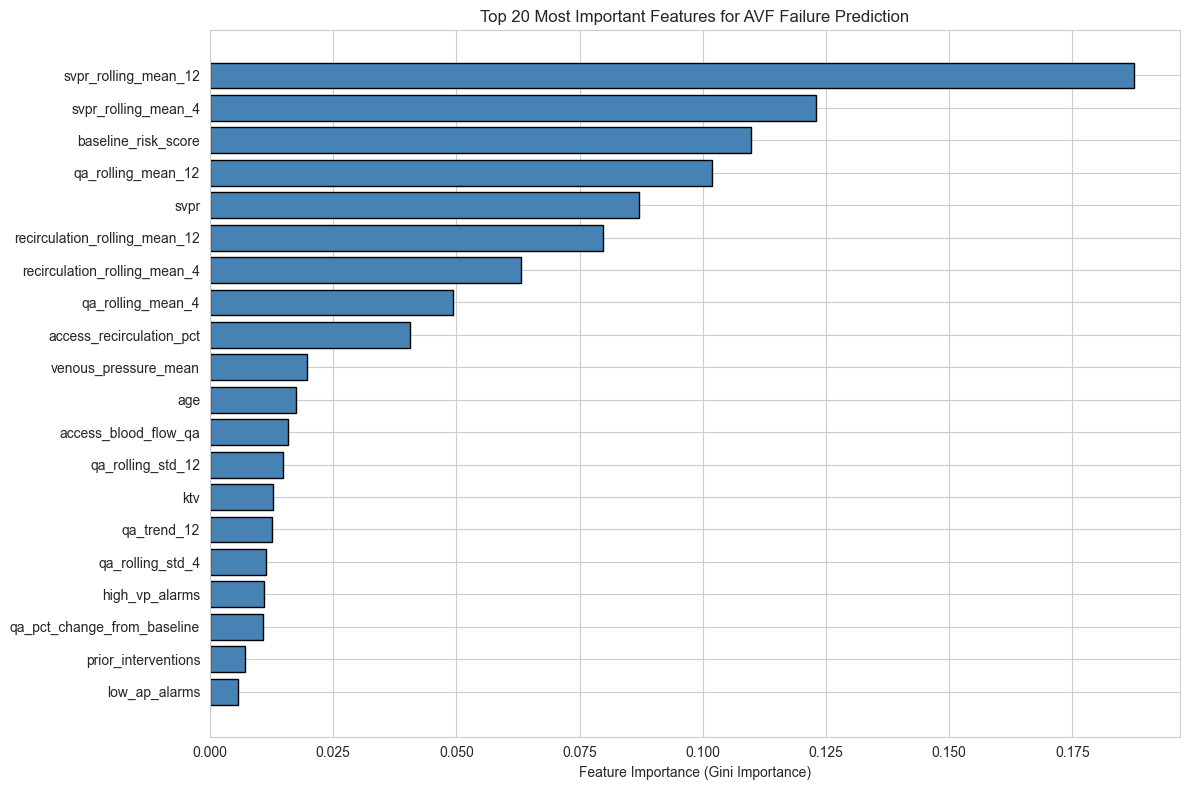

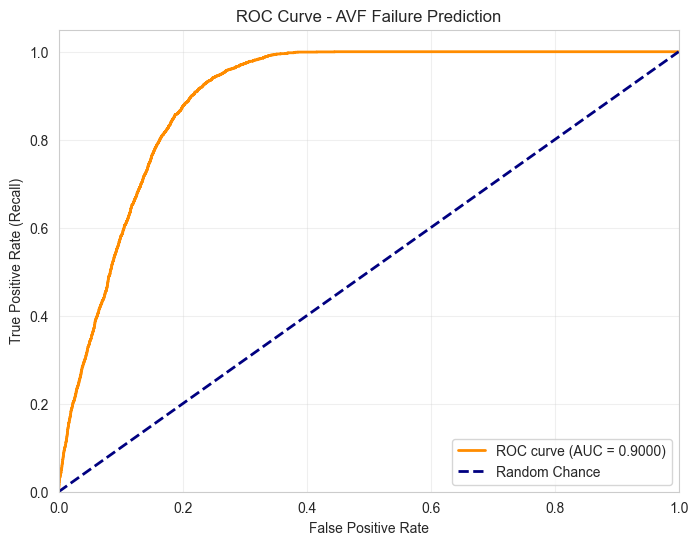

In [11]:
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance_df.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (Gini Importance)')
plt.title(f'Top {top_n} Most Important Features for AVF Failure Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - AVF Failure Prediction')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [12]:
print("=" * 60)
print("SAVING MODEL AND RESULTS")
print("=" * 60)

# Save the trained model
import joblib
joblib.dump(rf_model, '../models/rf_avf_failure_model.pkl')
print("✓ Model saved to ../models/rf_avf_failure_model.pkl")

# Save feature importance
feature_importance_df.to_csv('../results/feature_importance.csv', index=False)
print("✓ Feature importance saved")

# Save predictions on test set for further analysis
test_results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'predicted_probability': y_pred_prob
})
test_results.to_csv('../results/test_predictions.csv', index=False)
print("✓ Test predictions saved")

# Print summary for documentation
print("\n" + "=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)
print(f"""
Model Performance:
- AUC-ROC: {auc:.4f}
- Recall (Sensitivity): {cm[1,1] / (cm[1,1] + cm[1,0]):.1%}
- Precision: {cm[1,1] / (cm[1,1] + cm[0,1]):.1%}
- Total predictions: {len(y_test):,}
- Correct predictions: {(y_pred == y_test).sum():,} ({(y_pred == y_test).mean():.1%})

Dataset:
- Patients: 1,000
- Total treatments: 156,000
- Failure rate: 42.4%
- Features: {len(feature_columns)}

Top 3 Predictive Features:
1. {feature_importance_df.iloc[0]['feature']} ({feature_importance_df.iloc[0]['importance']:.1%})
2. {feature_importance_df.iloc[1]['feature']} ({feature_importance_df.iloc[1]['importance']:.1%})
3. {feature_importance_df.iloc[2]['feature']} ({feature_importance_df.iloc[2]['importance']:.1%})
""")

SAVING MODEL AND RESULTS
✓ Model saved to ../models/rf_avf_failure_model.pkl
✓ Feature importance saved
✓ Test predictions saved

PROJECT SUMMARY

Model Performance:
- AUC-ROC: 0.9000
- Recall (Sensitivity): 88.4%
- Precision: 30.4%
- Total predictions: 27,400
- Correct predictions: 21,998 (80.3%)

Dataset:
- Patients: 1,000
- Total treatments: 156,000
- Failure rate: 42.4%
- Features: 26

Top 3 Predictive Features:
1. svpr_rolling_mean_12 (18.7%)
2. svpr_rolling_mean_4 (12.3%)
3. baseline_risk_score (11.0%)

